In [1]:
%matplotlib widget
import sqlalchemy
import pandas as pd
import ipywidgets as widgets
import numpy as np
engine = sqlalchemy.create_engine('postgresql://postgres:postgres@db:5432/weather')

In [2]:
realtime = pd.read_sql("SELECT format('%%s,%%s', lat, lon) as latlon, * FROM realtime", engine)


In [3]:
@widgets.interact(latlon=realtime['latlon'])
def show_realtime(latlon):
    df = realtime[realtime['latlon'] == latlon]
    return df.loc[:, df.columns != 'latlon'].transpose()


interactive(children=(Dropdown(description='latlon', options=('25.8600,-97.4200', '25.9000,-97.5200'), value='…

In [4]:
timeline = pd.read_sql("select format('%%s,%%s', lat, lon) as latlon, * from timeline", engine)

interactive(children=(Dropdown(description='latlon', options=('25.8600,-97.4200', '25.9000,-97.5200'), value='…

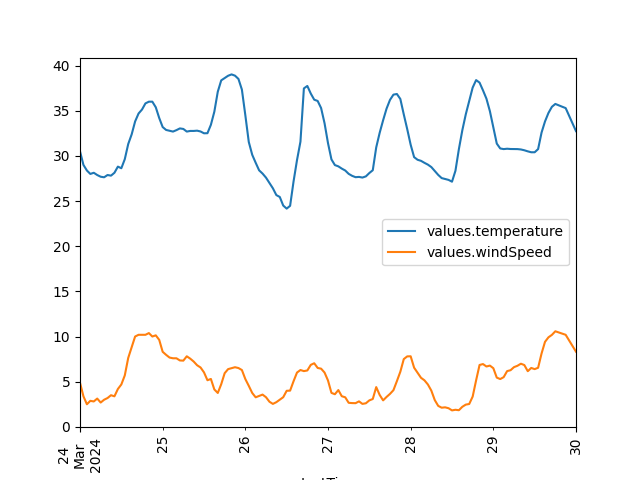

In [5]:
from matplotlib import pyplot as plt
@widgets.interact(latlon=realtime['latlon'])
def show_timeline(latlon):
    # return realtime[realtime['location.lat'] == lat & realtime['location.lon'] == lon]
    # return realtime[realtime['latlon'] == latlon].
    df = timeline[timeline['latlon'] == latlon]
    df = df.loc[:, df.columns != 'latlon']
    df = df.sort_values(by=['startTime'])
    df.plot(x='startTime', rot=90)
    # plt.pause(1e-10)
